In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv('EuroGrid-Raw.csv')
raw_df

,Ticket,Open Time,Type,Volume,Item,Price,S / L,T / P,Close Time,Price.1,Commission,Taxes,Swap,Profit
0,40950953,2023.11.17 01:38:07,balance,DEPOSIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100 000.00
1,40951351,2023.11.17 03:21:05,sell,0.01,eurusd,1.08566,0,1.08491,2023.11.17 05:23:07,1.08491,-0.06,0,0,0.75
2,40951870,2023.11.17 05:35:03,sell,0.01,eurusd,1.08479,0,1.0848,2023.11.17 07:00:14,1.0848,-0.06,0,0,-0.01
3,40951871,2023.11.17 05:36:01,sell,0.01,eurusd,1.08482,0,1.0848,2023.11.17 07:00:14,1.0848,-0.06,0,0,0.02
4,40951880,2023.11.17 05:37:00,sell,0.01,eurusd,1.08488,0,1.0848,2023.11.17 07:00:14,1.0848,-0.06,0,0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17815,67569.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17816,Summary:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17817,Deposit/Withdrawal:,NaN,-69 576.53,NaN,Credit Facility:,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
17818,Closed Trade P/L:,NaN,69 576.53,NaN,Floating P/L:,NaN,NaN,NaN,0,Margin:,NaN,NaN,0,NaN


In [3]:
raw_df = raw_df[(raw_df["Type"] == "buy") | (raw_df["Type"] == "sell")]

In [4]:
raw_df.loc[1, "Open Time"]

'2023.11.17 03:21:05'

In [5]:
raw_df

,Ticket,Open Time,Type,Volume,Item,Price,S / L,T / P,Close Time,Price.1,Commission,Taxes,Swap,Profit
1,40951351,2023.11.17 03:21:05,sell,0.01,eurusd,1.08566,0,1.08491,2023.11.17 05:23:07,1.08491,-0.06,0,0,0.75
2,40951870,2023.11.17 05:35:03,sell,0.01,eurusd,1.08479,0,1.0848,2023.11.17 07:00:14,1.0848,-0.06,0,0,-0.01
3,40951871,2023.11.17 05:36:01,sell,0.01,eurusd,1.08482,0,1.0848,2023.11.17 07:00:14,1.0848,-0.06,0,0,0.02
4,40951880,2023.11.17 05:37:00,sell,0.01,eurusd,1.08488,0,1.0848,2023.11.17 07:00:14,1.0848,-0.06,0,0,0.08
5,40951882,2023.11.17 05:38:01,sell,0.01,eurusd,1.08492,0,1.0848,2023.11.17 07:00:14,1.0848,-0.06,0,0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17799,41547022,2024.02.02 05:41:03,sell,5.68,eurusd,1.08802,0,1.0869,2024.02.02 13:30:01,1.0867,-56.8,0,0,749.76
17800,41547027,2024.02.02 05:42:26,sell,5.97,eurusd,1.088,0,1.0869,2024.02.02 13:30:01,1.0867,-59.7,0,0,776.1
17801,41547032,2024.02.02 05:43:02,buy,0.01,eurusd,1.08812,0,1.0887,2024.02.02 07:24:06,1.08868,-0.1,0,0,0.56
17802,41547037,2024.02.02 05:43:52,sell,6.27,eurusd,1.08809,0,1.0869,2024.02.02 13:30:01,1.0867,-62.7,0,0,871.53


In [6]:
raw_df["Open Time"] = pd.to_datetime(raw_df["Open Time"], format='%Y.%m.%d %H:%M:%S')
raw_df["Close Time"] = pd.to_datetime(raw_df["Close Time"], format='%Y.%m.%d %H:%M:%S')

/var/folders/vs/30ft52l558d1rbpgypntjn240000gn/T/ipykernel_90946/2142152413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df["Open Time"] = pd.to_datetime(raw_df["Open Time"], format='%Y.%m.%d %H:%M:%S')
/var/folders/vs/30ft52l558d1rbpgypntjn240000gn/T/ipykernel_90946/2142152413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df["Close Time"] = pd.to_datetime(raw_df["Close Time"], format='%Y.%m.%d %H:%M:%S')


In [7]:
for column in ['Commission', 'Taxes', 'Swap', 'Profit']:
    raw_df[column] = raw_df[column].astype(str).str.replace(' ', '').astype(float)

/var/folders/vs/30ft52l558d1rbpgypntjn240000gn/T/ipykernel_90946/1856249929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df[column] = raw_df[column].astype(str).str.replace(' ', '').astype(float)


In [8]:
initial_balance = 100000
raw_df['Balance'] = initial_balance + raw_df[['Commission', 'Taxes', 'Swap', 'Profit']].cumsum(axis=0).sum(axis=1)

/var/folders/vs/30ft52l558d1rbpgypntjn240000gn/T/ipykernel_90946/1809108340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Balance'] = initial_balance + raw_df[['Commission', 'Taxes', 'Swap', 'Profit']].cumsum(axis=0).sum(axis=1)


In [9]:
raw_df = raw_df.rename(columns={'Price': 'Opening Price', 'Price.1': 'Closing Price'})

In [10]:
raw_df['Opening Price'] = raw_df['Opening Price'].astype(float)
raw_df['Volume'] = raw_df['Volume'].astype(float)
raw_df['S / L'] = raw_df['S / L'].astype(float)
raw_df['T / P'] = raw_df['T / P'].astype(float)
raw_df['Closing Price'] = raw_df['Closing Price'].astype(float)
raw_df

,Ticket,Open Time,Type,Volume,Item,Opening Price,S / L,T / P,Close Time,Closing Price,Commission,Taxes,Swap,Profit,Balance
1,40951351,2023-11-17 03:21:05,sell,0.01,eurusd,1.08566,0.0,1.08491,2023-11-17 05:23:07,1.08491,-0.06,0.0,0.0,0.75,100000.69
2,40951870,2023-11-17 05:35:03,sell,0.01,eurusd,1.08479,0.0,1.08480,2023-11-17 07:00:14,1.08480,-0.06,0.0,0.0,-0.01,100000.62
3,40951871,2023-11-17 05:36:01,sell,0.01,eurusd,1.08482,0.0,1.08480,2023-11-17 07:00:14,1.08480,-0.06,0.0,0.0,0.02,100000.58
4,40951880,2023-11-17 05:37:00,sell,0.01,eurusd,1.08488,0.0,1.08480,2023-11-17 07:00:14,1.08480,-0.06,0.0,0.0,0.08,100000.60
5,40951882,2023-11-17 05:38:01,sell,0.01,eurusd,1.08492,0.0,1.08480,2023-11-17 07:00:14,1.08480,-0.06,0.0,0.0,0.12,100000.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17799,41547022,2024-02-02 05:41:03,sell,5.68,eurusd,1.08802,0.0,1.08690,2024-02-02 13:30:01,1.08670,-56.80,0.0,0.0,749.76,168050.36
17800,41547027,2024-02-02 05:42:26,sell,5.97,eurusd,1.08800,0.0,1.08690,2024-02-02 13:30:01,1.08670,-59.70,0.0,0.0,776.10,168766.76
17801,41547032,2024-02-02 05:43:02,buy,0.01,eurusd,1.08812,0.0,1.08870,2024-02-02 07:24:06,1.08868,-0.10,0.0,0.0,0.56,168767.22
17802,41547037,2024-02-02 05:43:52,sell,6.27,eurusd,1.08809,0.0,1.08690,2024-02-02 13:30:01,1.08670,-62.70,0.0,0.0,871.53,169576.05


In [11]:
list_of_dfs = [df_group for _, df_group in raw_df.groupby('Close Time')]

In [13]:
for i, df in enumerate(list_of_dfs):
    df.to_csv('trades/trade_' + str(i) + '.csv')

In [12]:
list_of_dfs

[     Ticket           Open Time  Type  Volume    Item  Opening Price  S / L  \
 1  40951351 2023-11-17 03:21:05  sell    0.01  eurusd        1.08566    0.0   
 
      T / P          Close Time  Closing Price  Commission  Taxes  Swap  \
 1  1.08491 2023-11-17 05:23:07        1.08491       -0.06    0.0   0.0   
 
    Profit    Balance  
 1    0.75  100000.69  ,
       Ticket           Open Time  Type  Volume    Item  Opening Price  S / L  \
 2   40951870 2023-11-17 05:35:03  sell    0.01  eurusd        1.08479    0.0   
 3   40951871 2023-11-17 05:36:01  sell    0.01  eurusd        1.08482    0.0   
 4   40951880 2023-11-17 05:37:00  sell    0.01  eurusd        1.08488    0.0   
 5   40951882 2023-11-17 05:38:01  sell    0.01  eurusd        1.08492    0.0   
 6   40951888 2023-11-17 05:39:01  sell    0.01  eurusd        1.08496    0.0   
 7   40951896 2023-11-17 05:40:01  sell    0.01  eurusd        1.08496    0.0   
 8   40951899 2023-11-17 05:41:07  sell    0.01  eurusd        1.08502

In [13]:
list_of_dfs[1]

,Ticket,Open Time,Type,Volume,Item,Opening Price,S / L,T / P,Close Time,Closing Price,Commission,Taxes,Swap,Profit,Balance
2,40951870,2023-11-17 05:35:03,sell,0.01,eurusd,1.08479,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,-0.01,100000.62
3,40951871,2023-11-17 05:36:01,sell,0.01,eurusd,1.08482,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.02,100000.58
4,40951880,2023-11-17 05:37:00,sell,0.01,eurusd,1.08488,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.08,100000.60
5,40951882,2023-11-17 05:38:01,sell,0.01,eurusd,1.08492,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.12,100000.66
6,40951888,2023-11-17 05:39:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.76
7,40951896,2023-11-17 05:40:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.86
8,40951899,2023-11-17 05:41:07,sell,0.01,eurusd,1.08502,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.22,100001.02
9,40951905,2023-11-17 05:42:14,sell,0.01,eurusd,1.08504,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.24,100001.20
10,40951908,2023-11-17 05:44:01,sell,0.01,eurusd,1.08505,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.25,100001.39
11,40951915,2023-11-17 05:45:02,sell,0.01,eurusd,1.08510,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.30,100001.63


In [28]:
max_rows = 0
max_idx = 0
for i, df in enumerate(list_of_dfs):
    rows, cols = df.shape
    max_rows = max(rows, max_rows)
    max_idx = i if max_rows == rows else max_idx
max_rows, max_idx

(109, 86)

In [15]:
len(list_of_dfs)

1759

In [16]:
list_of_dfs[1]

,Ticket,Open Time,Type,Volume,Item,Opening Price,S / L,T / P,Close Time,Closing Price,Commission,Taxes,Swap,Profit,Balance
2,40951870,2023-11-17 05:35:03,sell,0.01,eurusd,1.08479,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,-0.01,100000.62
3,40951871,2023-11-17 05:36:01,sell,0.01,eurusd,1.08482,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.02,100000.58
4,40951880,2023-11-17 05:37:00,sell,0.01,eurusd,1.08488,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.08,100000.60
5,40951882,2023-11-17 05:38:01,sell,0.01,eurusd,1.08492,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.12,100000.66
6,40951888,2023-11-17 05:39:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.76
7,40951896,2023-11-17 05:40:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.86
8,40951899,2023-11-17 05:41:07,sell,0.01,eurusd,1.08502,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.22,100001.02
9,40951905,2023-11-17 05:42:14,sell,0.01,eurusd,1.08504,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.24,100001.20
10,40951908,2023-11-17 05:44:01,sell,0.01,eurusd,1.08505,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.25,100001.39
11,40951915,2023-11-17 05:45:02,sell,0.01,eurusd,1.08510,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.30,100001.63


In [17]:
hedging_trades = [df.shape[0] for df in list_of_dfs]

Text(0.5, 1.0, 'Histogram of Number of Trades Within an Initial Position')

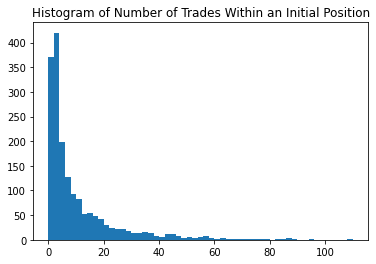

In [190]:
bin_width = 2
bins = np.arange(0, max(hedging_trades) + bin_width, bin_width)
plt.hist(hedging_trades, bins=bins)
plt.title("Histogram of Number of Trades Within an Initial Position")

In [166]:
opening_price_pip_distances = [[] for _ in range(max_rows)]
closing_price_pip_distances = [[] for _ in range(max_rows)]

In [151]:
for df in list_of_dfs:
    open_prices_array = np.array(df['Opening Price'])
    distances = np.abs(open_prices_array[1:] - open_prices_array[0]) * 10000
    for i, distance in enumerate(distances):
        print(i)
        opening_price_pip_distances[i].append(distance)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
0
0
0
0
0
1
0
1
2
3
4
5
6
7
8
9
10
0
1
2
0
1
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
0
1
2
3
4
5
0
1
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
0
1
2
3


In [167]:
for df in list_of_dfs:
    open_price = df['Opening Price'].iloc[0]
    direction = df['Type'].iloc[0]
    closing_prices_array = np.array(df['Closing Price'])
    distances = (closing_prices_array[1:] - open_price) * 10000 if direction == 'buy' else (open_price - closing_prices_array[1:]) * 10000
    for i, distance in enumerate(distances):
        closing_price_pip_distances[i].append(distance)

In [168]:
len(closing_price_pip_distances)

109

In [169]:
closing_price_pip_distances[0]

[-0.10000000000065512,
 5.1000000000001044,
 4.799999999998139,
 -36.599999999999966,
 -36.90000000000193,
 -35.199999999999676,
 4.3999999999999595,
 -0.20000000000131024,
 -5.9000000000009045,
 6.200000000000649,
 -4.499999999998394,
 -1.80000000000069,
 -1.100000000000545,
 1.9999999999997797,
 3.5000000000007248,
 5.1000000000001044,
 5.299999999999194,
 -0.4999999999988347,
 2.5999999999992696,
 4.699999999999704,
 -1.500000000000945,
 2.20000000000109,
 3.1999999999987594,
 5.199999999998539,
 2.2999999999995246,
 -35.69999999999851,
 -11.600000000000499,
 -0.5999999999994898,
 4.500000000000615,
 -13.000000000000789,
 5.20000000000076,
 -8.40000000000174,
 4.900000000001015,
 3.2999999999994145,
 -13.499999999999623,
 -3.6999999999998145,
 1.100000000000545,
 3.900000000001125,
 5.499999999998284,
 -15.199999999999658,
 3.1000000000003247,
 2.4000000000001798,
 0.700000000000145,
 5.20000000000076,
 3.6999999999998145,
 -34.09999999999913,
 2.2999999999995246,
 2.599999999999269

In [170]:
opening_price_pip_distances = [np.array(list) for list in opening_price_pip_distances]
closing_price_pip_distances = [np.array(list) for list in closing_price_pip_distances]

Text(0.5, 1.0, 'Histogram of Pips Away of 1st Hedge From Initial Trade')

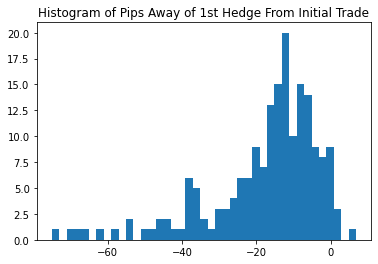

In [185]:
order = 25
bin_width = 2
bins = np.arange(min(closing_price_pip_distances[order]), max(closing_price_pip_distances[order]) + bin_width, bin_width)
plt.hist(closing_price_pip_distances[order], bins=bins)
plt.title("Histogram of Pips Away of 1st Hedge From Initial Trade")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Mean Pips VS Number of Hedge')

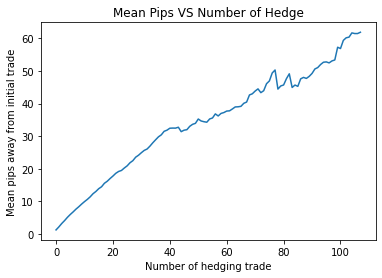

In [137]:
average_opening_price_pip_distances = [np.mean(arr) for arr in opening_price_pip_distances]
plt.plot(average_opening_price_pip_distances)
plt.xlabel('Number of hedging trade')
plt.ylabel('Mean pips away from initial trade')
plt.title('Mean Pips VS Number of Hedge')

In [138]:
average_opening_price_pip_distances[:5]

[1.2590057636887877,
 2.189795918367371,
 3.2261363636363427,
 4.120973348783317,
 5.115194805194816]

Text(0.5, 1.0, 'Median Pips VS Number of Hedge')

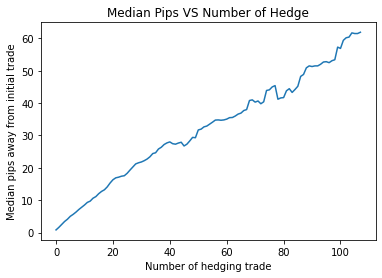

In [139]:
median_opening_price_pip_distances = [np.median(arr) for arr in opening_price_pip_distances]
plt.plot(median_opening_price_pip_distances)
plt.xlabel('Number of hedging trade')
plt.ylabel('Median pips away from initial trade')
plt.title('Median Pips VS Number of Hedge')

In [140]:
median_opening_price_pip_distances[:5]

[0.7999999999985796,
 1.5999999999993797,
 2.500000000000835,
 3.4000000000000696,
 4.100000000000215]

In [192]:
list_of_dfs[1]

,Ticket,Open Time,Type,Volume,Item,Opening Price,S / L,T / P,Close Time,Closing Price,Commission,Taxes,Swap,Profit,Balance
2,40951870,2023-11-17 05:35:03,sell,0.01,eurusd,1.08479,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,-0.01,100000.62
3,40951871,2023-11-17 05:36:01,sell,0.01,eurusd,1.08482,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.02,100000.58
4,40951880,2023-11-17 05:37:00,sell,0.01,eurusd,1.08488,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.08,100000.60
5,40951882,2023-11-17 05:38:01,sell,0.01,eurusd,1.08492,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.12,100000.66
6,40951888,2023-11-17 05:39:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.76
7,40951896,2023-11-17 05:40:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.86
8,40951899,2023-11-17 05:41:07,sell,0.01,eurusd,1.08502,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.22,100001.02
9,40951905,2023-11-17 05:42:14,sell,0.01,eurusd,1.08504,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.24,100001.20
10,40951908,2023-11-17 05:44:01,sell,0.01,eurusd,1.08505,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.25,100001.39
11,40951915,2023-11-17 05:45:02,sell,0.01,eurusd,1.08510,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.30,100001.63


In [195]:
result_pip_averages = []
for df in list_of_dfs:
    results = (df['Closing Price'] - df['Opening Price']) * 10000
    if df['Type'].iloc[0] == 'sell':
        results *= -1
    weights = np.multiply(df['Volume'], (df['Closing Price'] - df['Opening Price']) * 10000)
    weighted_avg = np.sum(weights) / np.sum(df['Volume'])
    result_pip_averages.append(weighted_avg)

Text(0.5, 1.0, 'Histogram of Weighted Result of Trades')

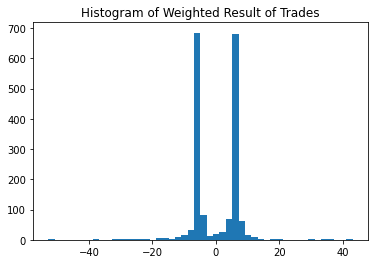

In [205]:
bin_width = 2
bins = np.arange(min(result_pip_averages), max(result_pip_averages) + bin_width, bin_width)
plt.hist(result_pip_averages, bins=bins)
plt.title("Histogram of Weighted Result of Trades")

In [224]:
list_of_dfs[1720]

,Ticket,Open Time,Type,Volume,Item,Opening Price,S / L,T / P,Close Time,Closing Price,Commission,Taxes,Swap,Profit,Balance
17545,41536170,2024-02-01 11:37:01,buy,0.01,eurusd,1.08078,0.0,1.08127,2024-02-01 11:54:17,1.08129,-0.1,0.0,0.0,0.51,159581.37
17549,41536332,2024-02-01 11:40:08,buy,0.01,eurusd,1.08082,0.0,1.08127,2024-02-01 11:54:17,1.08129,-0.1,0.0,0.0,0.47,159582.52
17550,41536370,2024-02-01 11:41:02,buy,0.01,eurusd,1.08068,0.0,1.08127,2024-02-01 11:54:17,1.08129,-0.1,0.0,0.0,0.61,159583.03
17551,41536406,2024-02-01 11:42:00,buy,0.01,eurusd,1.08063,0.0,1.08127,2024-02-01 11:54:17,1.08129,-0.1,0.0,0.0,0.66,159583.59
17552,41536446,2024-02-01 11:43:10,buy,0.01,eurusd,1.08059,0.0,1.08127,2024-02-01 11:54:17,1.08129,-0.1,0.0,0.0,0.70,159584.19
17553,41536486,2024-02-01 11:44:01,buy,0.01,eurusd,1.08052,0.0,1.08127,2024-02-01 11:54:17,1.08129,-0.1,0.0,0.0,0.77,159584.86


In [235]:
raw_df['Pips'] = raw_df.apply(lambda x: (x['Opening Price'] - x['Closing Price']) * 10000 if x['Type'] == 'sell' else (x['Closing Price'] - x['Opening Price']) * 10000, axis=1)

In [229]:
raw_df['Total Profit'] = raw_df['Commission'] + raw_df['Taxes'] + raw_df['Swap'] + raw_df['Profit']
raw_df['Close Date'] = raw_df['Close Time'].dt.date

In [239]:
daily_profit_avg_pips = raw_df.groupby('Close Date')['Pips'].sum()
daily_profit_avg_pips

Close Date
2023-11-17    -361.3
2023-11-20    -460.0
2023-11-21     412.3
2023-11-22     677.7
2023-11-23    -574.6
2023-11-24    1027.1
2023-11-27    1248.9
2023-11-28     903.2
2023-11-29     514.8
2023-11-30    1054.2
2023-12-01     828.4
2023-12-03      17.8
2023-12-04     779.2
2023-12-05     623.6
2023-12-06     492.4
2023-12-07    1531.4
2023-12-08    1034.5
2023-12-11     971.6
2023-12-12    -123.4
2023-12-13    1630.7
2023-12-14     -81.2
2023-12-15    1553.8
2023-12-18    -234.2
2023-12-19    1036.6
2023-12-20    -297.0
2023-12-21     547.6
2023-12-22    -886.3
2023-12-25      -7.9
2023-12-26     771.9
2023-12-27     279.9
2023-12-28     906.2
2023-12-29    -989.8
2024-01-01     123.4
2024-01-02    -187.6
2024-01-03    1160.0
2024-01-04    1073.4
2024-01-05     161.4
2024-01-07      83.1
2024-01-08     823.8
2024-01-09    1237.9
2024-01-10     966.3
2024-01-11    1248.5
2024-01-12     971.2
2024-01-15     783.6
2024-01-16     977.0
2024-01-17    1580.6
2024-01-18     374.6
20

Text(0.5, 1.0, 'Histogram of Daily Profits in Pips')

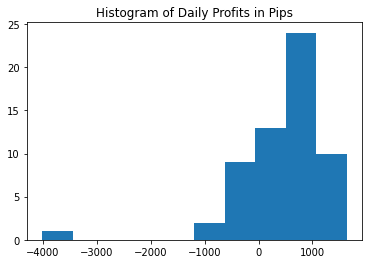

In [269]:
plt.hist(daily_profit_avg_pips)
plt.title("Histogram of Daily Profits in Pips")

In [ ]:
daily_avg_profit = raw_df.groupby('Close Date')['Total Profit'].mean().reset_index()

In [241]:
daily_avg_profit["Total Profit"].mean()

4.648140323578559

In [234]:
daily_avg_profit["Total Profit"].median()

1.5871003717472119

Text(0.5, 1.0, 'Histogram of Daily Profits in $')

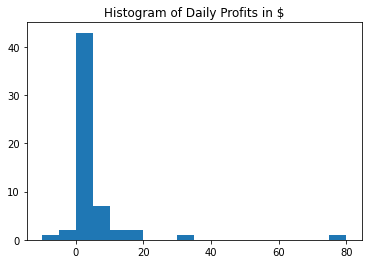

In [264]:
bin_width = 5
bins = np.arange(-10, max(daily_avg_profit["Total Profit"]) + bin_width, bin_width)
plt.hist(daily_avg_profit["Total Profit"], bins=bins)
plt.title("Histogram of Daily Profits in $")

In [19]:
list_of_incremental_lot_size_dfs = [df_group for _, df_group in raw_df[raw_df["Volume"] != 0.01].groupby('Close Time')]

In [24]:
len(list_of_dfs)

1759

(array([638., 162.,  82.,  42.,  31.,  10.,   6.,   7.,   5.,   2.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

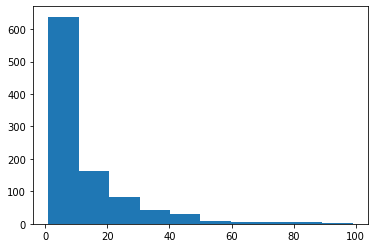

In [27]:
incremental_lot_size_hedges = [len(df) for df in list_of_incremental_lot_size_dfs]

Text(0.5, 1.0, 'Histogram of Number of Hedges (Incl. Initial Trade)\nfor Incremental-Lot-Size Trades')

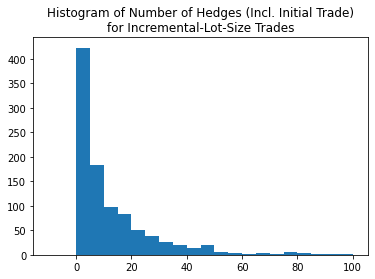

In [29]:
bin_width = 5
bins = np.arange(-10, max(incremental_lot_size_hedges) + bin_width, bin_width)
plt.hist(incremental_lot_size_hedges, bins=bins)
plt.title("Histogram of Number of Hedges (Incl. Initial Trade)\nfor Incremental-Lot-Size Trades")

In [31]:
np.median(incremental_lot_size_hedges)

6.0

In [22]:
len(list_of_incremental_lot_size_dfs)

985

In [37]:
def max_drawdown(df):
    initial_trade_open_price = df.iloc[0]['Opening Price']
    worst_trade_open_price = max(df['Opening Price']) if df.iloc[0]['Type'] == 'sell' else min(df['Opening Price'])
    drawdown = (initial_trade_open_price - worst_trade_open_price) * 10000 if df.iloc[0]['Type'] == 'sell' else (worst_trade_open_price - initial_trade_open_price) * 10000
    return drawdown

In [38]:
max_drawdown_list = [max_drawdown(df) for df in list_of_incremental_lot_size_dfs]

Text(0.5, 1.0, 'Histogram of Maximum Drawdowns in Pips of Initial Trades \nfor Incremental-Lot-Size Trades')

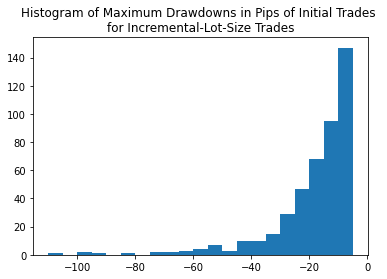

In [47]:
bin_width = 5
bins = np.arange(min(max_drawdown_list) // 5 * 5, 0, bin_width)
plt.hist(max_drawdown_list, bins=bins)
plt.title("Histogram of Maximum Drawdowns in Pips of Initial Trades \nfor Incremental-Lot-Size Trades")

In [48]:
np.mean(max_drawdown_list)

-9.062944162436592

In [49]:
np.median(max_drawdown_list)

-3.9999999999995595

In [27]:
rows_count = [len(df) for df in list_of_dfs]

In [28]:
profit_hedge_level_list = [[] for _ in range(max(rows_count))]
profit_hedge_level_list

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [29]:
def append_profit_loss(df, lists):
    for i in range(len(df) - 1):  # Exclude the last trade
        open_price = df.iloc[i]['Opening Price']
        close_price = df.iloc[i]['Closing Price']
        p_l_pips = (close_price - open_price) * 10000 if df.iloc[i]['Type'] == 'sell' else (open_price - close_price) * 10000
        lists[i].append(p_l_pips)
    return lists

In [30]:
mean_profit_hedge_level_list = [np.mean(list) for list in profit_hedge_level_list]
mean_profit_hedge_level_list

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [31]:
for df in list_of_dfs:
    append_profit_loss(df, profit_hedge_level_list)

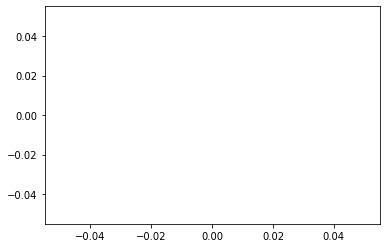

In [32]:
plt.plot(mean_profit_hedge_level_list)

In [51]:
list_of_dfs[1]

,Ticket,Open Time,Type,Volume,Item,Opening Price,S / L,T / P,Close Time,Closing Price,Commission,Taxes,Swap,Profit,Balance
2,40951870,2023-11-17 05:35:03,sell,0.01,eurusd,1.08479,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,-0.01,100000.62
3,40951871,2023-11-17 05:36:01,sell,0.01,eurusd,1.08482,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.02,100000.58
4,40951880,2023-11-17 05:37:00,sell,0.01,eurusd,1.08488,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.08,100000.60
5,40951882,2023-11-17 05:38:01,sell,0.01,eurusd,1.08492,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.12,100000.66
6,40951888,2023-11-17 05:39:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.76
7,40951896,2023-11-17 05:40:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.86
8,40951899,2023-11-17 05:41:07,sell,0.01,eurusd,1.08502,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.22,100001.02
9,40951905,2023-11-17 05:42:14,sell,0.01,eurusd,1.08504,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.24,100001.20
10,40951908,2023-11-17 05:44:01,sell,0.01,eurusd,1.08505,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.25,100001.39
11,40951915,2023-11-17 05:45:02,sell,0.01,eurusd,1.08510,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.30,100001.63


In [46]:
hedges_df = list_of_dfs[0].iloc[1:]

In [50]:
list_of_dfs[1]

,Ticket,Open Time,Type,Volume,Item,Opening Price,S / L,T / P,Close Time,Closing Price,Commission,Taxes,Swap,Profit,Balance
2,40951870,2023-11-17 05:35:03,sell,0.01,eurusd,1.08479,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,-0.01,100000.62
3,40951871,2023-11-17 05:36:01,sell,0.01,eurusd,1.08482,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.02,100000.58
4,40951880,2023-11-17 05:37:00,sell,0.01,eurusd,1.08488,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.08,100000.60
5,40951882,2023-11-17 05:38:01,sell,0.01,eurusd,1.08492,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.12,100000.66
6,40951888,2023-11-17 05:39:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.76
7,40951896,2023-11-17 05:40:01,sell,0.01,eurusd,1.08496,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.16,100000.86
8,40951899,2023-11-17 05:41:07,sell,0.01,eurusd,1.08502,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.22,100001.02
9,40951905,2023-11-17 05:42:14,sell,0.01,eurusd,1.08504,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.24,100001.20
10,40951908,2023-11-17 05:44:01,sell,0.01,eurusd,1.08505,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.25,100001.39
11,40951915,2023-11-17 05:45:02,sell,0.01,eurusd,1.08510,0.0,1.0848,2023-11-17 07:00:14,1.0848,-0.06,0.0,0.0,0.30,100001.63


In [52]:
hedges_df.shape[0]

0

In [18]:
def calculate_average_hedge_profit(list_of_dfs):
    total_profit_pips = 0
    total_hedges = 0
    total_profit_pips_hedges = []

    for df in list_of_dfs:
        hedges_df = df.iloc[1:]
        profit_pips = (hedges_df['Closing Price'] - hedges_df['Opening Price']) * 10000
        if hedges_df.shape[0] != 0 and hedges_df.iloc[0]['Type'] == 'sell':
            profit_pips *= -1
        total_profit_pips_hedges.append(profit_pips)
        
    return total_profit_pips_hedges

In [19]:
total_profit_pips_hedges = calculate_average_hedge_profit(list_of_dfs)
total_profit_pips_hedges = [value for series in total_profit_pips_hedges for value in series]
total_profit_pips_hedges

[0.1999999999990898,
 0.8000000000008001,
 1.2000000000012,
 1.5999999999993797,
 1.5999999999993797,
 2.20000000000109,
 2.4000000000001798,
 2.500000000000835,
 2.9999999999996696,
 3.2999999999994145,
 4.500000000000615,
 6.200000000000649,
 6.699999999999484,
 6.6000000000010495,
 7.099999999999884,
 7.200000000000539,
 7.600000000000939,
 7.800000000000029,
 7.699999999999374,
 8.20000000000043,
 4.599999999999049,
 4.599999999999049,
 4.899999999998794,
 5.399999999999849,
 5.499999999998284,
 -34.600000000000186,
 -34.30000000000044,
 -33.60000000000029,
 -33.09999999999924,
 -31.90000000000026,
 -31.69999999999895,
 -30.799999999999716,
 -30.200000000000227,
 -28.900000000000592,
 -27.900000000000702,
 -26.900000000000812,
 -26.399999999999757,
 -26.200000000000667,
 -24.200000000000887,
 -23.800000000000487,
 -23.200000000000998,
 -21.800000000000708,
 -20.100000000000673,
 -18.899999999999473,
 -18.899999999999473,
 -18.299999999999983,
 -17.799999999998928,
 -17.199999999999

In [20]:
np.median(total_profit_pips_hedges)

4.699999999999704

Text(0.5, 1.0, 'Histogram of Profit in Pips of Hedges')

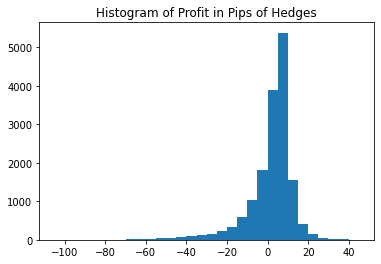

In [22]:
bin_width = 5
bins = np.arange(min(total_profit_pips_hedges) // 5 * 5, max(total_profit_pips_hedges), bin_width)
plt.hist(total_profit_pips_hedges, bins=bins)
plt.title("Histogram of Profit in Pips of Hedges")

In [36]:
seq_avg_profit_dollars = []
for i in range(1, max_rows):  # Adjusted max_rows to avoid index out of bounds
    print(i)
    total_profit = sum(
        df.loc[i:i+1, ['Commission', 'Taxes', 'Swap', 'Profit']].sum(axis=1).sum() 
        # if i < len(df) else 0  # Only sum if i is within the dataframe's index
        for df in list_of_dfs
    )
    count = sum(1 for df in list_of_dfs if i < len(df))  # Counting only dataframes where i is within the index
    avg_profit = total_profit / count if count > 0 else 0  # Calculating average, ensuring division by zero is handled
    seq_avg_profit_dollars.append(avg_profit)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108


In [37]:
seq_avg_profit_dollars

[0.000446685878962536,
 -9.760425909494231e-05,
 -2.066115702479338e-05,
 9.269988412514484e-05,
 0.0002077922077922078,
 0.00028328611898017,
 0.00040498442367601246,
 0.0005743243243243243,
 0.0006739526411657559,
 0.0008582834331337325,
 0.0010944206008583692,
 0.0015,
 0.0023002421307506053,
 0.0030000000000000005,
 0.003370473537604457,
 0.0037764350453172208,
 0.004212218649517685,
 0.004657534246575342,
 0.005278810408921933,
 0.005652173913043478,
 0.006150627615062762,
 0.005422222222222222,
 0.004232558139534884,
 0.00412621359223301,
 0.004123711340206186,
 0.004486486486486487,
 0.005290697674418605,
 0.005555555555555556,
 0.005870967741935484,
 -0.022430555555555554,
 -0.05134751773049646,
 -0.05270676691729323,
 -0.054409448818897636,
 -0.05565573770491803,
 -0.05963963963963964,
 -0.06113207547169812,
 -0.065,
 -0.06479166666666668,
 -0.06626373626373627,
 -0.06666666666666668,
 -0.06588235294117646,
 -0.06987179487179487,
 -0.07369863013698631,
 -0.07371428571428572,
 

Text(0.5, 1.0, 'Average Profit in $ of Each Hedge Level')

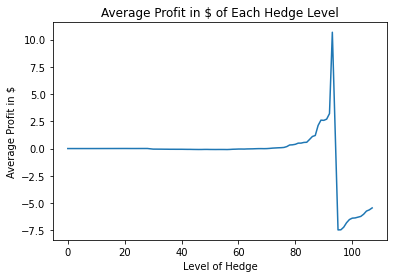

In [47]:
plt.plot(seq_avg_profit_dollars)
plt.xlabel("Level of Hedge")
plt.ylabel("Average Profit in $")
plt.title("Average Profit in $ of Each Hedge Level")

Text(0.5, 1.0, 'Average Profit in $ of Each Hedge Level')

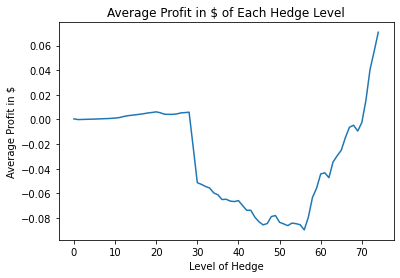

In [46]:
plt.plot(seq_avg_profit_dollars[:75])
plt.xlabel("Level of Hedge")
plt.ylabel("Average Profit in $")
plt.title("Average Profit in $ of Each Hedge Level")